# Exploratory Data Analysis on Retail Sales

# Loading Dataset


**Importing Libraries**

In [51]:
import pandas as pd
import numpy as np

**Loading Dataset**

In [52]:
df = pd.read_csv('/content/retail_sales_dataset.csv')

**Initial Exploration**

In [53]:
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [55]:
print(df.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


# Data Cleaning

**Checking for the null values**

In [56]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


There are no existing null values.

**Filling if null values exists**

In [57]:
df.fillna(method='ffill', inplace=True)

**Drropping duplicated values**

In [58]:
df.drop_duplicates(inplace=True)

In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [60]:
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


# Descriptive Statistics

In [61]:
# Calculating mean, median, and standard deviation for numerical columns
mean_values = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mean()
median_values = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].median()
std_values = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].std()

print("Mean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
print("\nStandard deviation values:")
print(std_values)


Mean values:
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median values:
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Standard deviation values:
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


In [62]:
# Calculating mode for numerical and categorical columns
mode_values = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount', 'Gender', 'Product Category']].mode().iloc[0]

print("\nMode values:")
print(mode_values)



Mode values:
Age                       43
Quantity                 4.0
Price per Unit          50.0
Total Amount            50.0
Gender                Female
Product Category    Clothing
Name: 0, dtype: object


Calculating mean, mean and mode for various attrinutes.

#   Outlier Detection

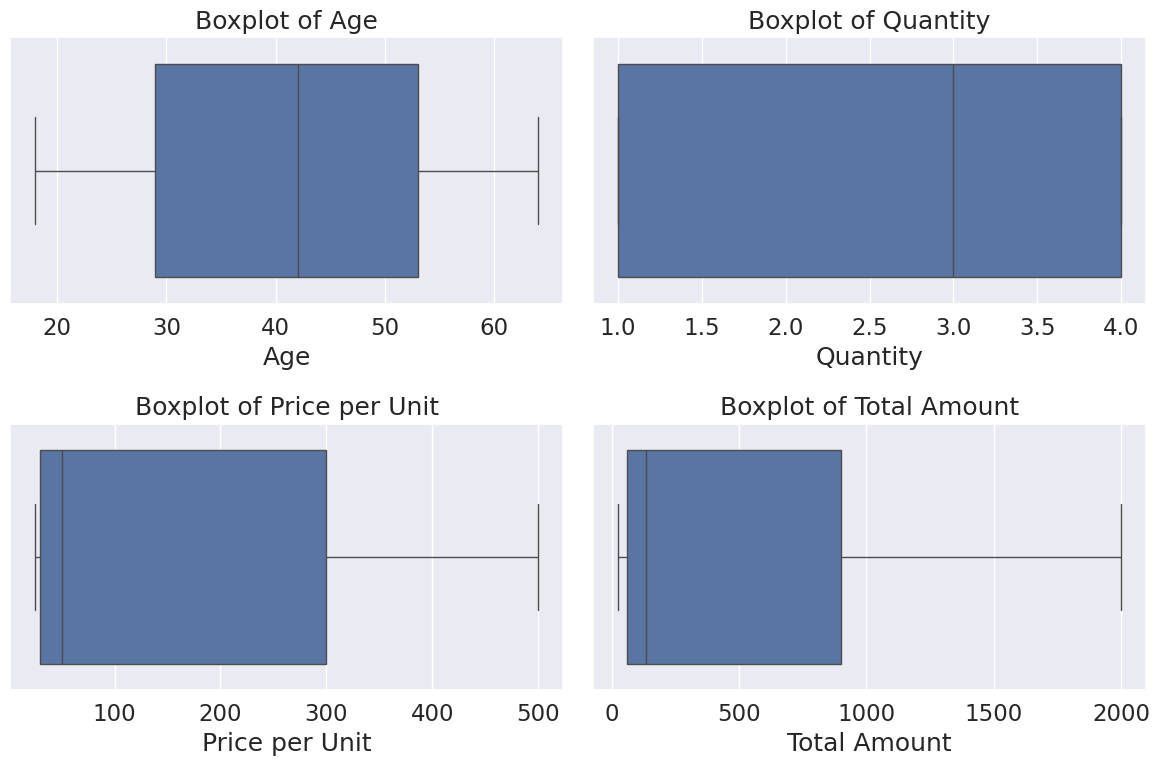

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for outlier detection
numerical_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

# Plot boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


We can see that, There are no outliers in the numerical columnss.

# Time Series Analysis

In [64]:
# seeing the date column
df['Date'] = pd.to_datetime(df['Date'])
# adding 'month' column and extract month from date
df['Month'] = df['Date'].dt.month_name()
df['Month']

0      November
1      February
2       January
3           May
4           May
         ...   
995         May
996    November
997     October
998    December
999       April
Name: Month, Length: 1000, dtype: object

**Sales Trends For Overtime**

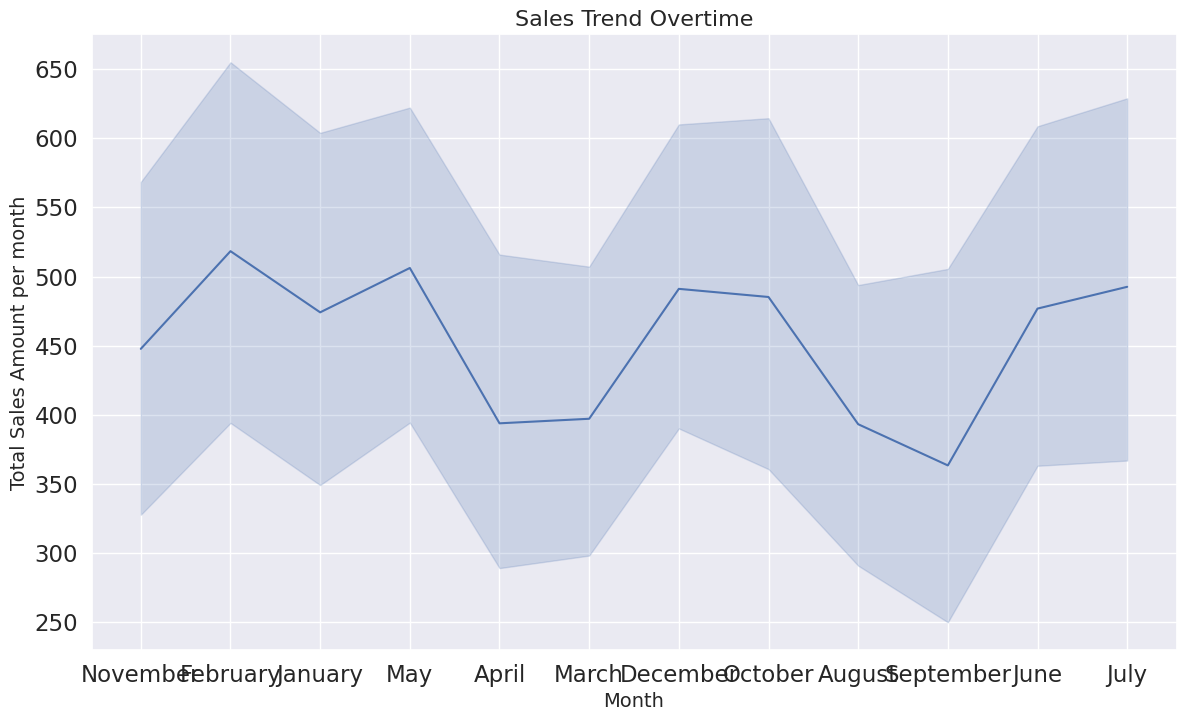

In [65]:
# Sales trends Overtime
import seaborn as sns
plt.figure(figsize=(14,8))
sns.lineplot(x='Month', y='Total Amount', data= df)
plt.title('Sales Trend Overtime', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Amount per month', fontsize=14)
plt.show()

The sales trend over time demonstrates fluctuations, with periods of increase and decrease occurring at similar rates. This cyclical pattern may suggest the influence of external factors such as market conditions, seasonal demand, or promotional activities. It indicates the need for careful planning around peak and low periods to maintain a consistent sales performance.

**Transafction Frequency Over Months**

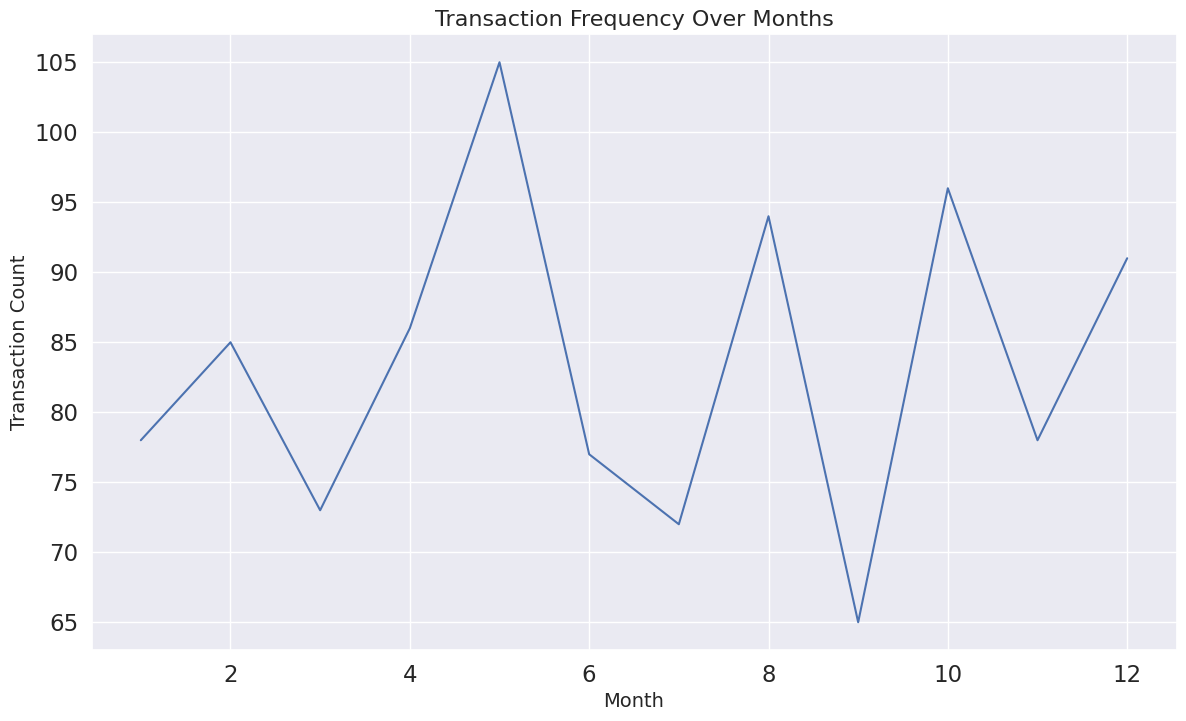

In [66]:
 #transaction frequency over months

df['Month'] = df['Date'].dt.month
transaction_count = df.groupby('Month')['Transaction ID'].count()


plt.figure(figsize=(14,8))
sns.lineplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.show()

The transaction frequency peaks significantly in the fifth month, indicating a major spike in customer transactions. This could be due to a specific marketing campaign, product launch, or seasonal event. Understanding the reasons behind this peak can help replicate such successful strategies in future months.

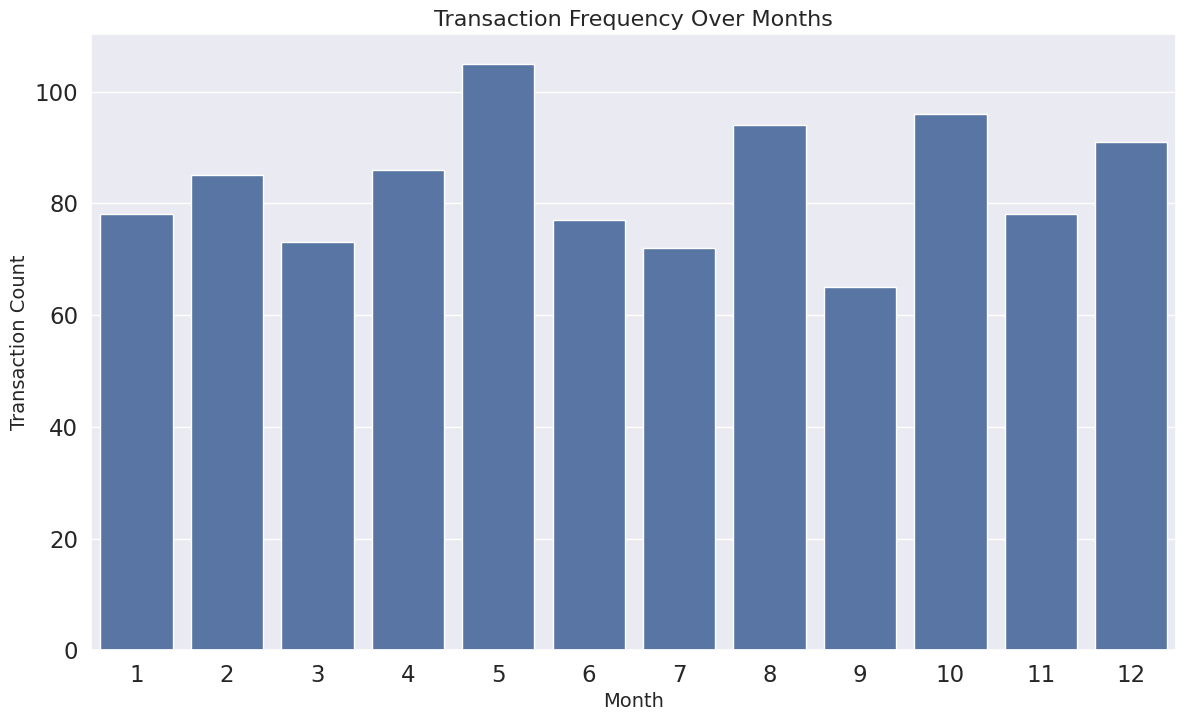

In [67]:
# bar blot
plt.figure(figsize=(14,8))
sns.barplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.show()

Clear peak in the month of may.

**Sales of Product Categories per Month**

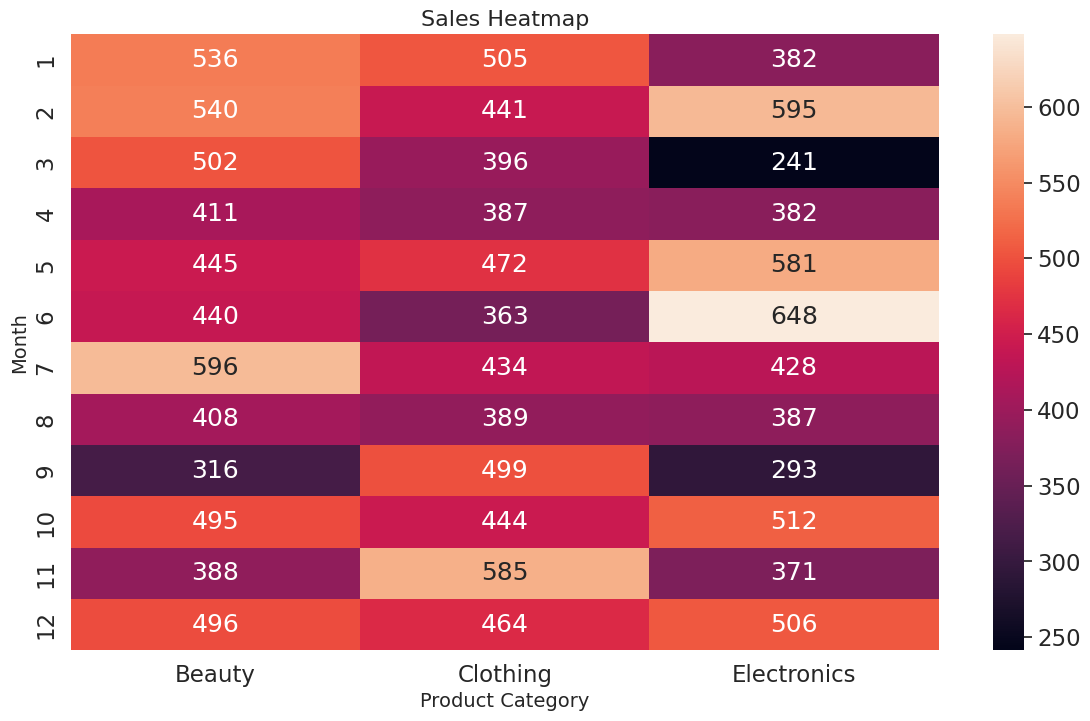

In [68]:
# Sales of Product Categories per month
heatmap = df.pivot_table(index='Month', columns='Product Category', values='Total Amount')
plt.figure(figsize=(14,8))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.show()

The heatmap reveals the distribution of sales across different product categories over each month. This visual representation helps identify which categories perform well in specific months, allowing for targeted promotions and inventory adjustments to maximize sales in high-performing categories.

**Average Sales Trend with Moving Average**

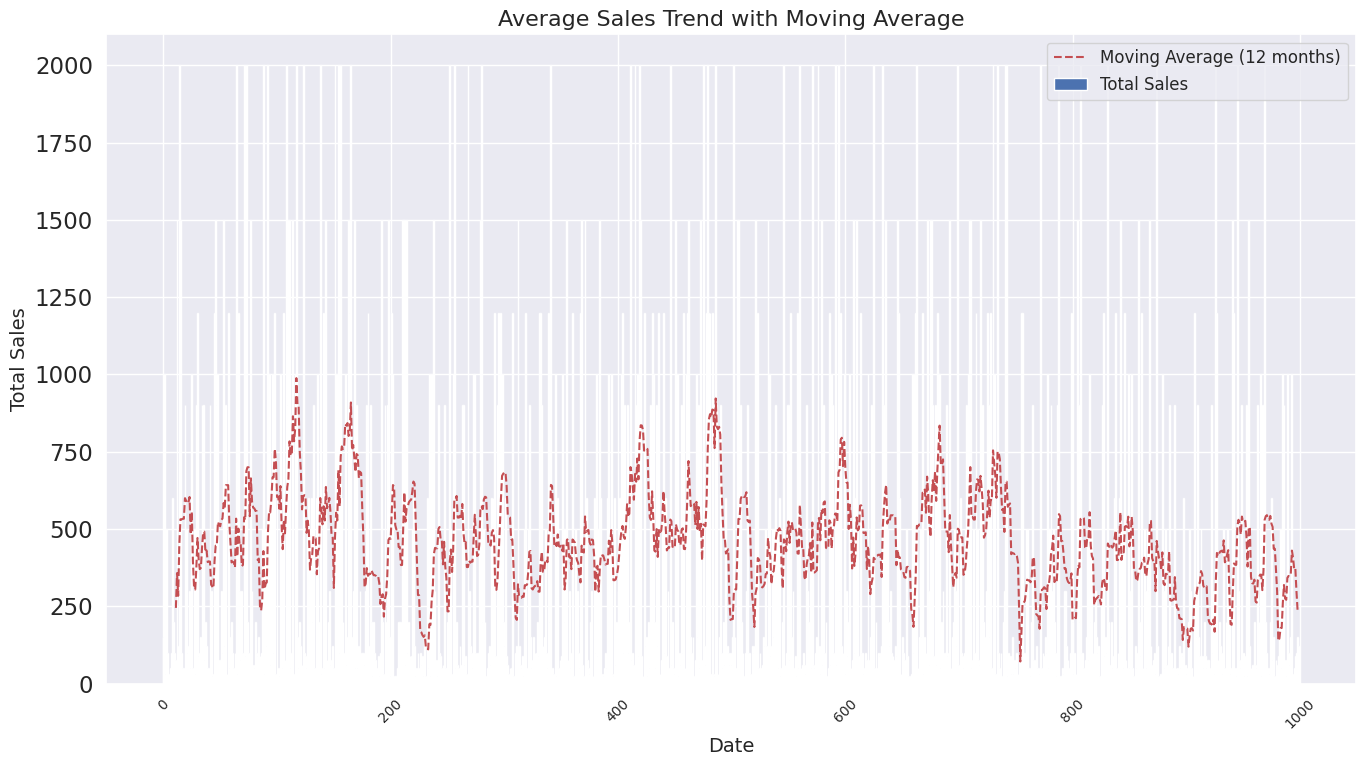

In [69]:
# Calculating the rolling mean (moving average)
df['Total Amount MA'] = df['Total Amount'].rolling(window=12).mean()

plt.figure(figsize=(14, 8))
plt.bar(df.index, df['Total Amount'], color='b', label='Total Sales')
plt.plot(df.index, df['Total Amount MA'], color='r', linestyle='--', label='Moving Average (12 months)')
plt.title('Average Sales Trend with Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=10, rotation=45)
plt.tight_layout()
plt.show()


The average sales trend, smoothed with a moving average, shows that the highest total sales amount reached is 1000. This provides a clearer view of the underlying sales pattern by filtering out short-term fluctuations. The moving average helps in identifying long-term trends and setting realistic sales targets.

**Seasonal Patterns in Sales**

<ipython-input-70-a1a411469967>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Total Amount', data=df, palette='viridis')


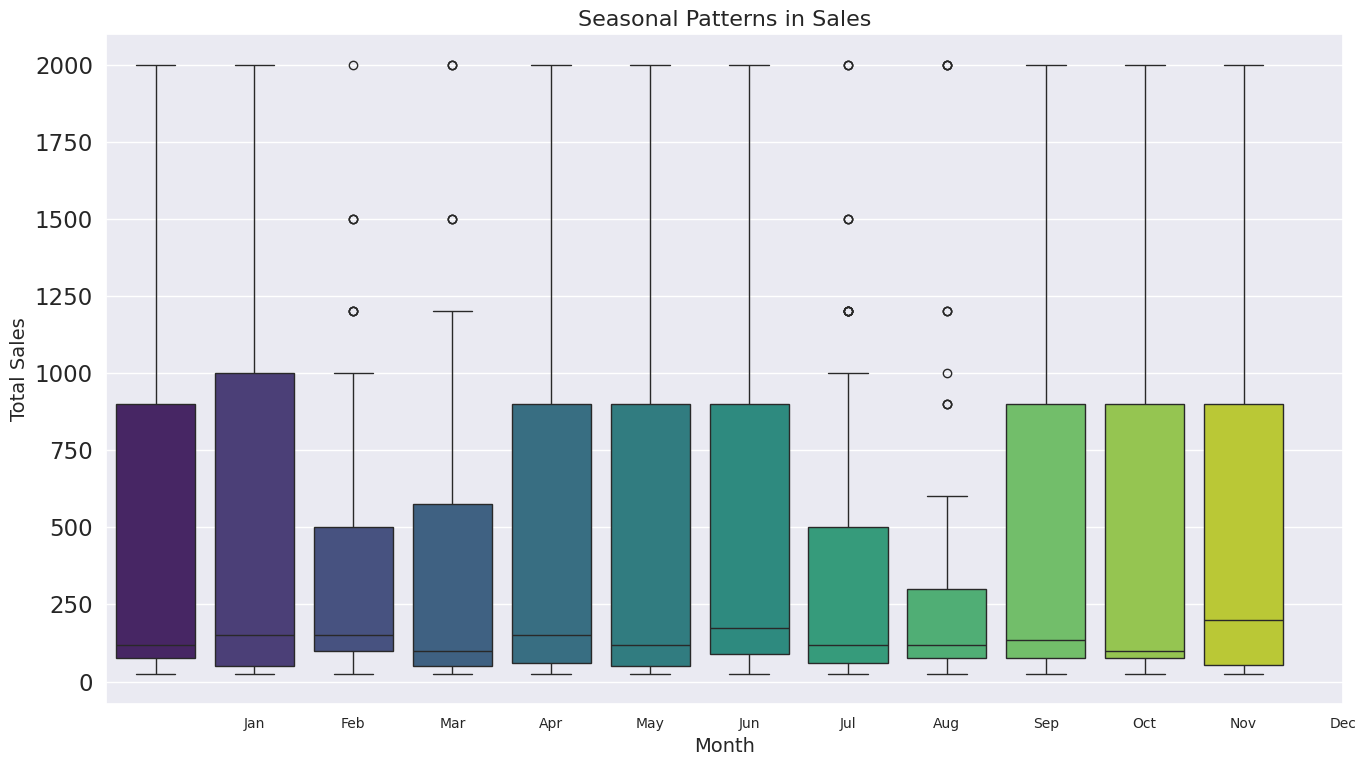

In [70]:
# Extract month from Date column
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Box plot to show seasonal patterns
plt.figure(figsize=(14, 8))
sns.boxplot(x='Month', y='Total Amount', data=df, palette='viridis')
plt.title('Seasonal Patterns in Sales', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
plt.tight_layout()
plt.show()


The box plot for monthly sales reveals the highest sales in January, with notable activity also seen in February, March, July, and August. The presence of bubbles in these months suggests occasional spikes in sales. Recognizing these seasonal patterns enables more effective inventory planning and marketing strategies to capitalize on high-demand periods.



# Customer Demographics

**Gender Distribution of Customers**

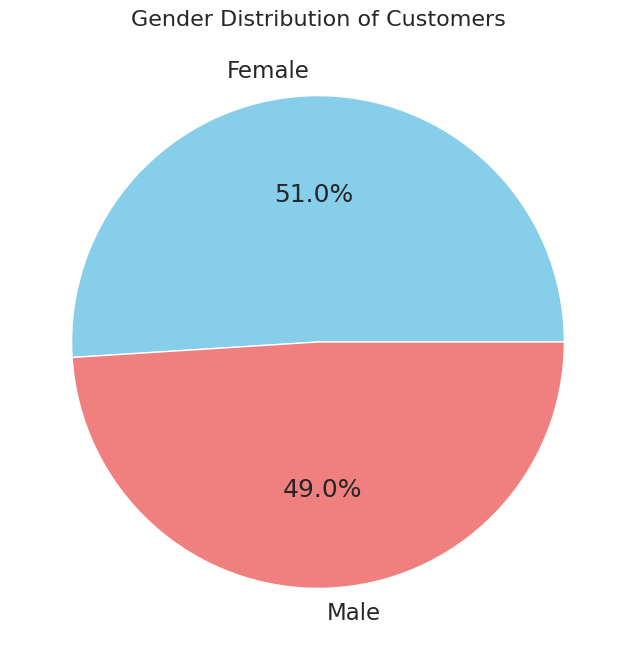

In [71]:
# Count gender distribution
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Customers', fontsize=16)
plt.show()


The gender distribution of customers is fairly balanced, with females constituting 51% and males 49% of the customer base. This near-equal split suggests that marketing strategies should be inclusive and appeal to both genders. Gender-specific promotions or product recommendations might not significantly impact overall sales but could be useful in targeted campaigns.

**Age Distribution of Customers**

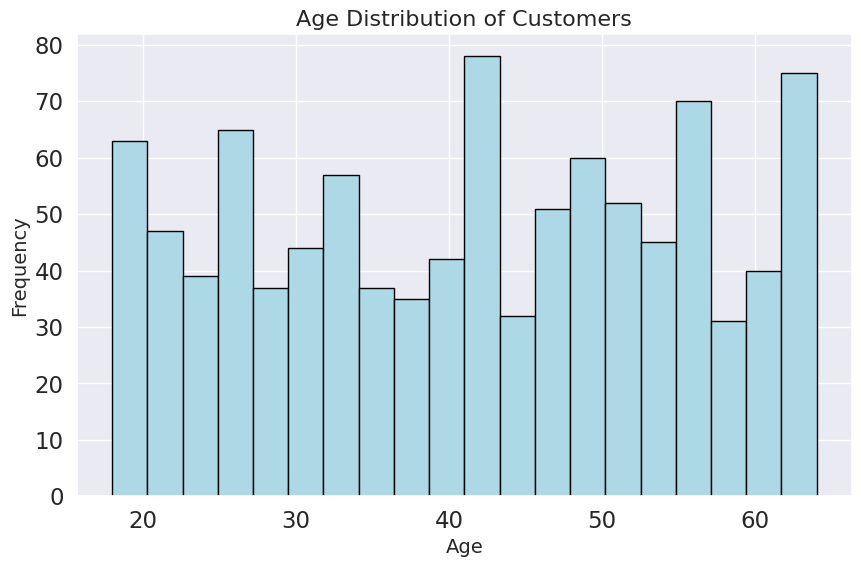

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='lightblue', edgecolor='black')
plt.title('Age Distribution of Customers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


The age distribution analysis reveals that customers around the age of 40 are the most frequent, with a frequency count of 78. This indicates that the majority of the customer base falls within a certain age bracket, likely influencing the types of products and marketing messages that will resonate most effectively. Tailoring products and marketing efforts to this age group can enhance customer engagement and satisfaction.

# Purchasing Behavior and Product Analysis

<ipython-input-73-dff3fee15661>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=sum, ci=None, palette='viridis')
<ipython-input-73-dff3fee15661>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=sum, ci=None, palette='viridis')


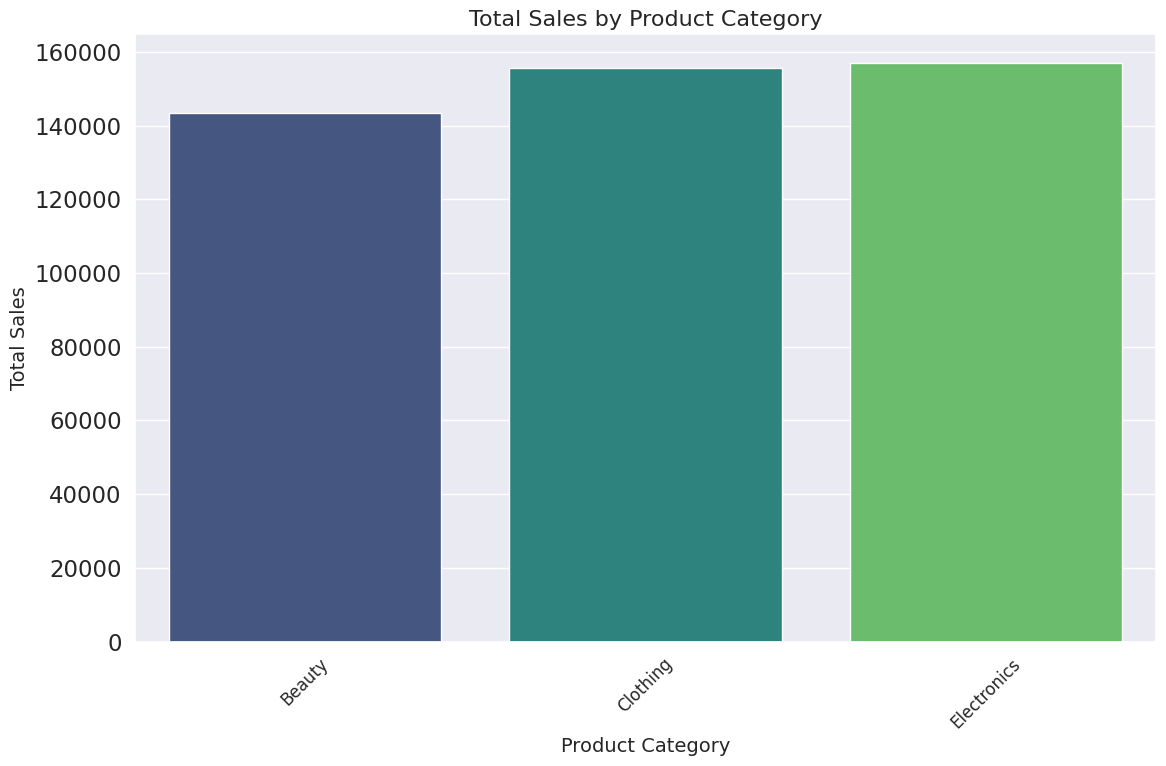

In [73]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


The analysis of total sales by product category reveals that clothing and electronics are the highest-grossing categories. This indicates strong customer demand in these areas. The business should focus on maintaining high inventory levels, providing a wide variety of options, and possibly offering frequent promotions in these categories to capitalize on their popularity.

<ipython-input-74-1196ebbb9457>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product Category', y='Price per Unit', data=df, palette='viridis')


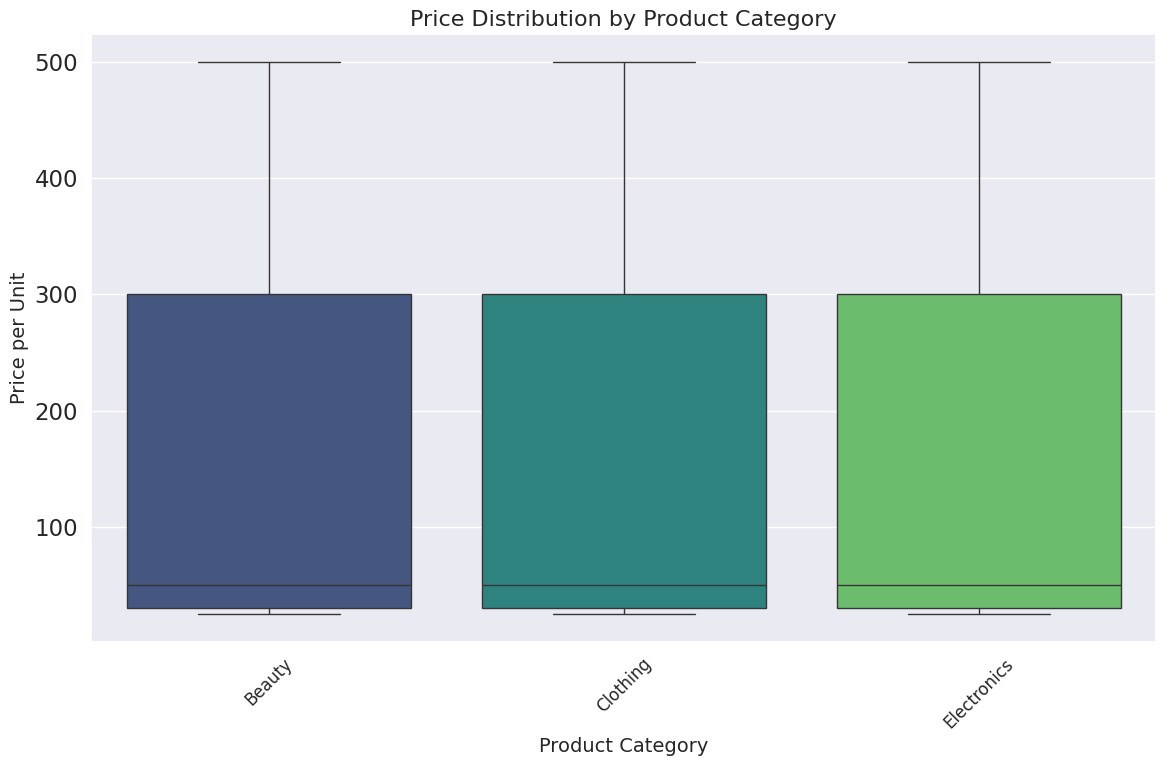

In [74]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Product Category', y='Price per Unit', data=df, palette='viridis')
plt.title('Price Distribution by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Price per Unit', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


The price distribution analysis via box plots shows that all three categories—clothing, electronics, and beauty—exhibit a similar pattern. The vertical box plots indicate a concentration of prices near the lower end of the range, with a long upper whisker, suggesting that most products are affordably priced but there are a few high-end, expensive items. This pricing strategy can attract a broad customer base, from budget-conscious shoppers to those looking for premium products.



# Advanced Customer and Product Analysis

**Customer Segmentataion by Age and Total Amount Spent**

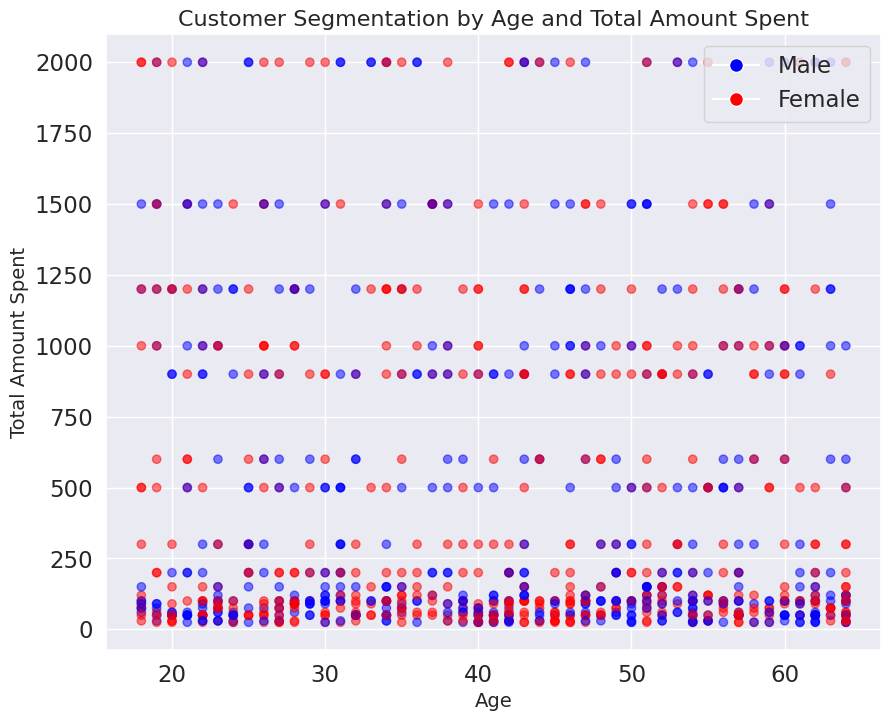

In [75]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Age'], df['Total Amount'], alpha=0.5, c=df['Gender'].map({'Male': 'blue', 'Female': 'red'}))
plt.title('Customer Segmentation by Age and Total Amount Spent', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Total Amount Spent', fontsize=14)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Male'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Female')])
plt.grid(True)
plt.show()


The customer segmentation analysis by age and total amount spent reveals distinct patterns. Across all monetary categories, the distribution appears even. However, a significant concentration of dots is observed in the 0-250 total amount spent category, indicating that a large number of customers are making relatively small purchases. This pattern suggests that while the customer base includes a range of spenders, there is a notable segment of low-spending customers. Understanding this distribution can help tailor marketing strategies to encourage higher spending among these customers.

**Top 10 Customers by Purchase Frequency**

<ipython-input-76-ca4855d37993>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_purchase_freq.index, y=customer_purchase_freq.values, palette='viridis')


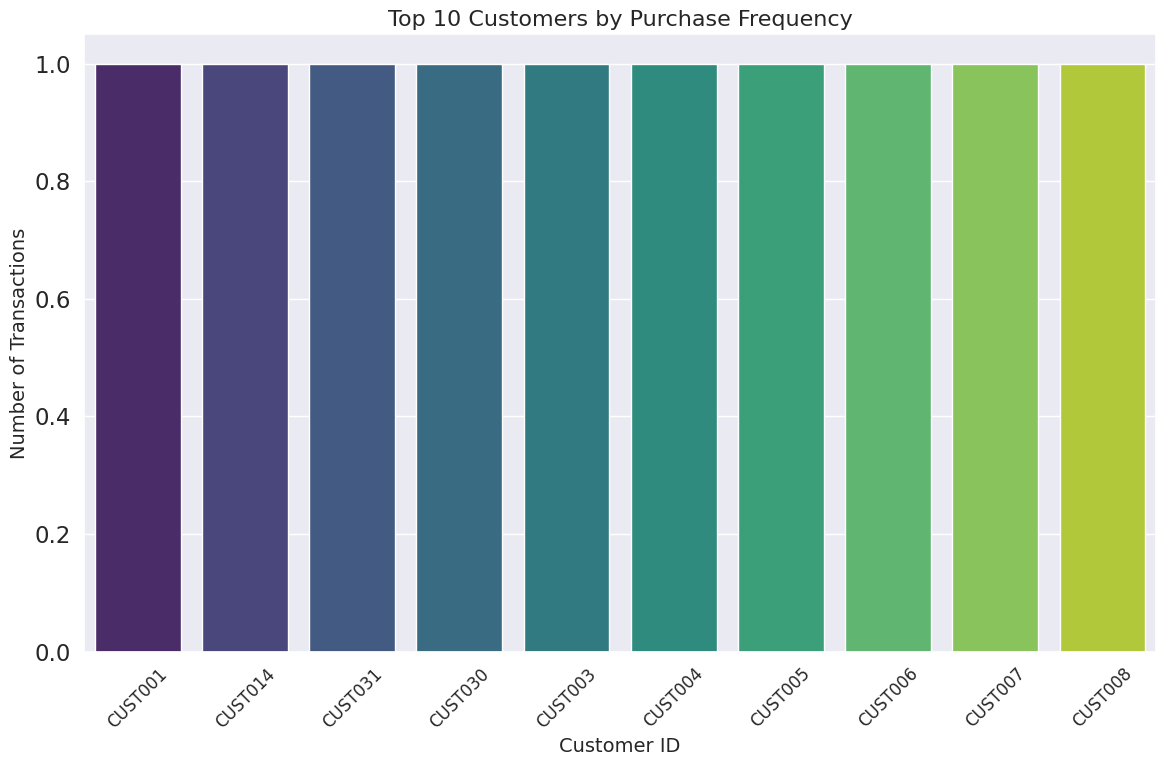

In [76]:
customer_purchase_freq = df['Customer ID'].value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 8))
sns.barplot(x=customer_purchase_freq.index, y=customer_purchase_freq.values, palette='viridis')
plt.title('Top 10 Customers by Purchase Frequency', fontsize=16)
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


The analysis identifies the top 10 customers who have made the highest number of purchases. This group represents the most loyal customers and a significant source of recurring revenue for the business. Focusing on maintaining and enhancing relationships with these top customers can lead to sustained business growth and increased customer lifetime value.

**Cumulative Sales over Time**

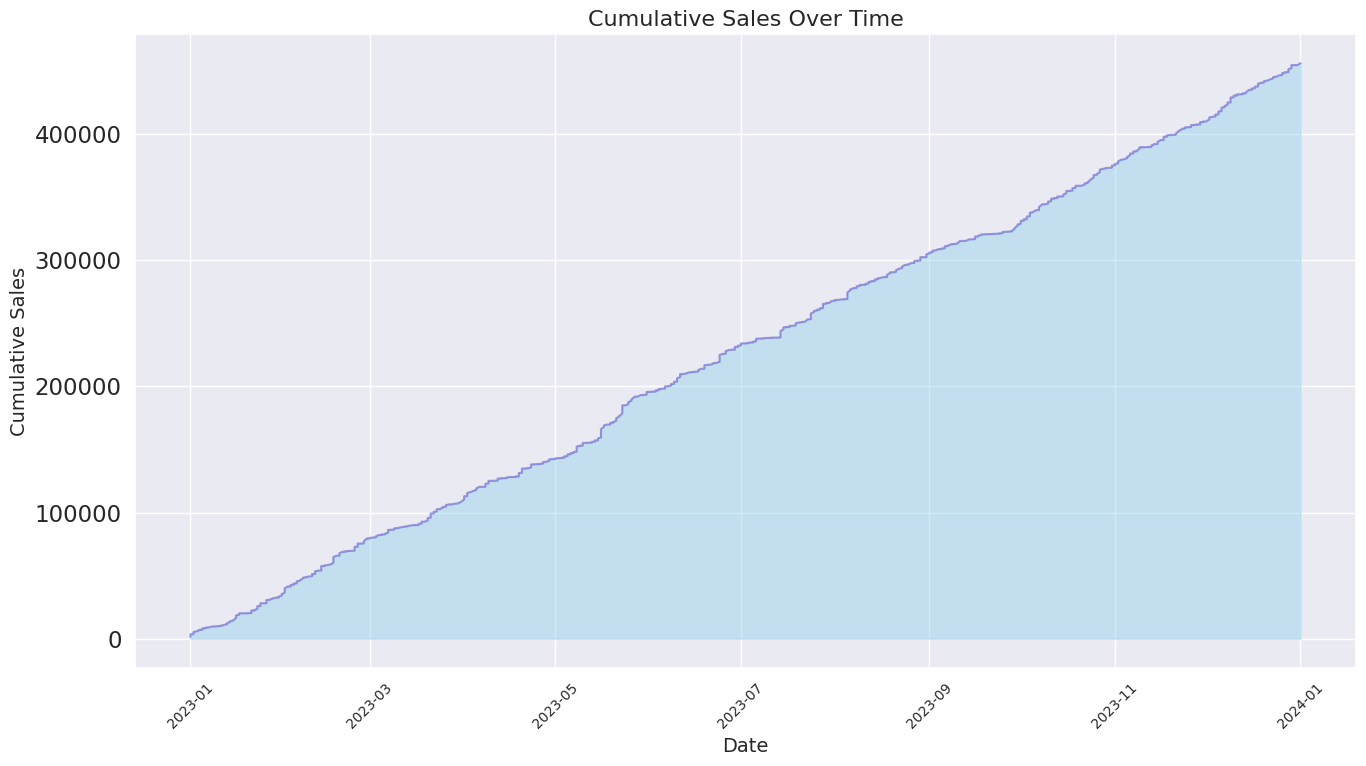

In [77]:
plt.figure(figsize=(14, 8))
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df['Cumulative Sales'] = df['Total Amount'].cumsum()
plt.fill_between(df['Date'], df['Cumulative Sales'], color='skyblue', alpha=0.4)
plt.plot(df['Date'], df['Cumulative Sales'], color='Slateblue', alpha=0.6)
plt.title('Cumulative Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


The cumulative sales plot indicates a steady and clean increase over time, reaching up to 400,000 in January 2024. This consistent growth suggests that the business has effective sales strategies and strong customer retention, pointing towards a healthy and expanding market presence. Continuing current practices while exploring new opportunities can help sustain and accelerate this growth trend.








**Age Distribution by Gender**

<ipython-input-78-78b983856f98>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Age', data=df, palette={'Male': 'skyblue', 'Female': 'lightcoral'})


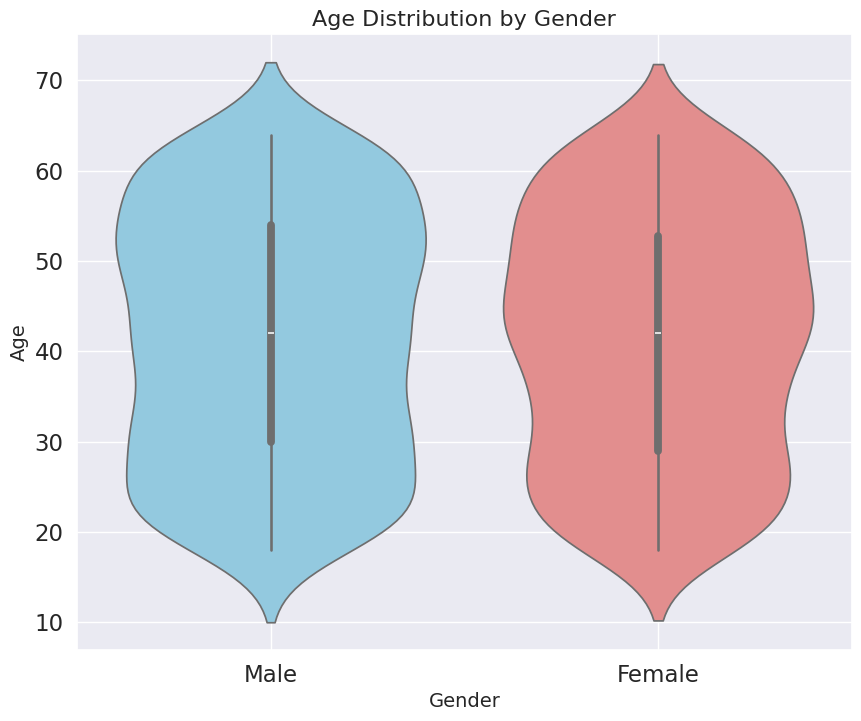

In [78]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.violinplot(x='Gender', y='Age', data=df, palette={'Male': 'skyblue', 'Female': 'lightcoral'})
plt.title('Age Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True)
plt.show()


The violin plot for age distribution by gender reveals key insights into the demographics of the customer base. The plot shows the density of age distribution for both male and female customers, highlighting the spread and central tendency of each gender group.

**Quantity Purchased by Gender**

<ipython-input-79-2ffc638f7a5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Quantity', data=df, palette={'Male': 'skyblue', 'Female': 'lightcoral'})


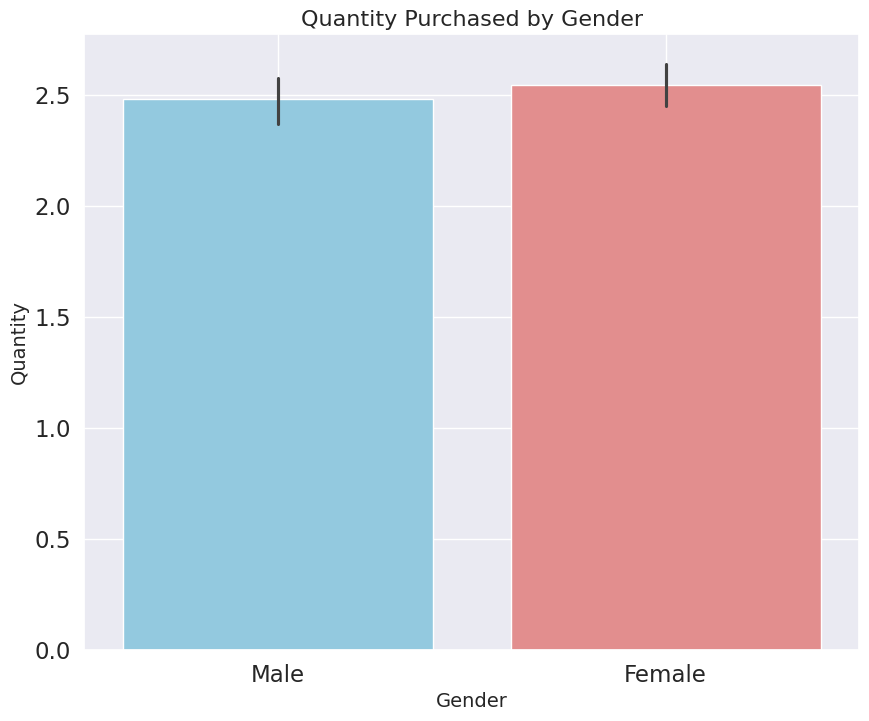

In [79]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Gender', y='Quantity', data=df, palette={'Male': 'skyblue', 'Female': 'lightcoral'})
plt.title('Quantity Purchased by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.grid(True)
plt.show()


The analysis of the quantity purchased by gender shows that female customers have a slightly higher purchase quantity compared to male customers. This indicates that women tend to buy more items per transaction than men.

**Quantity vs Total Amount Spent**

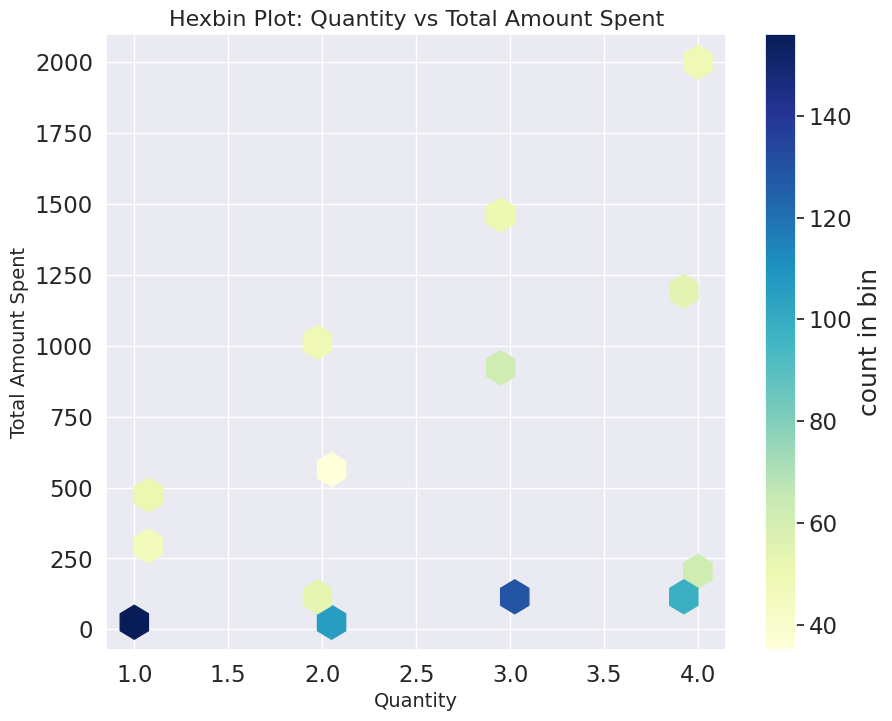

In [80]:
plt.figure(figsize=(10, 8))
plt.hexbin(df['Quantity'], df['Total Amount'], gridsize=20, cmap='YlGnBu', mincnt=1)
plt.colorbar(label='count in bin')
plt.title('Hexbin Plot: Quantity vs Total Amount Spent', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Total Amount Spent', fontsize=14)
plt.grid(True)
plt.show()


The hexbin plot of quantity versus total amount spent shows that the darkest shades are concentrated between the 0-250 range for both quantity and total amount. This indicates that the majority of transactions involve lower quantities and smaller total amounts.

**Sales by Product Category and Month**

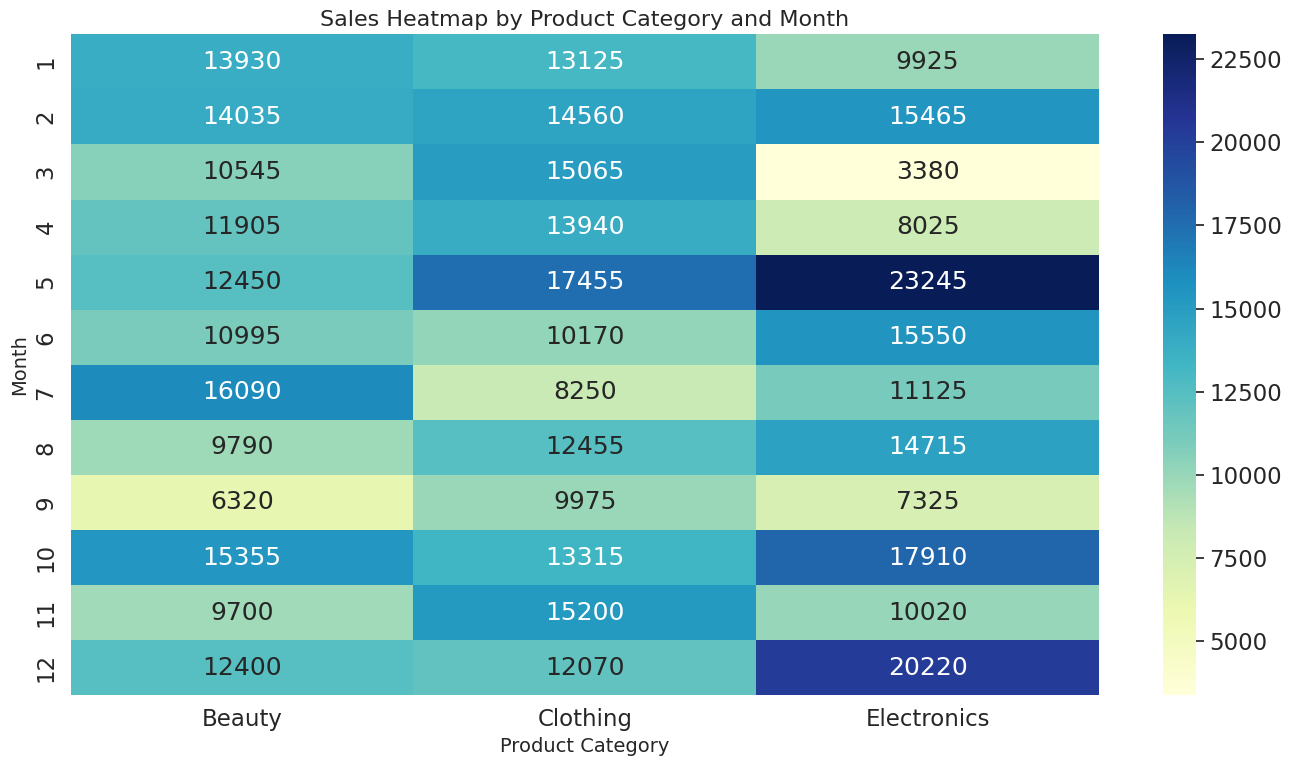

In [81]:
# Pivot table for heatmap
heatmap_data = df.pivot_table(index='Month', columns='Product Category', values='Total Amount', aggfunc=np.sum)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Sales Heatmap by Product Category and Month', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.tight_layout()
plt.show()


The sales heatmap by product category and month reveals that the darkest shade, indicating the highest sales, occurs in May for the electronics category. This suggests that electronics are particularly popular during this month, driving significant sales.

**Correlation Heatmap**

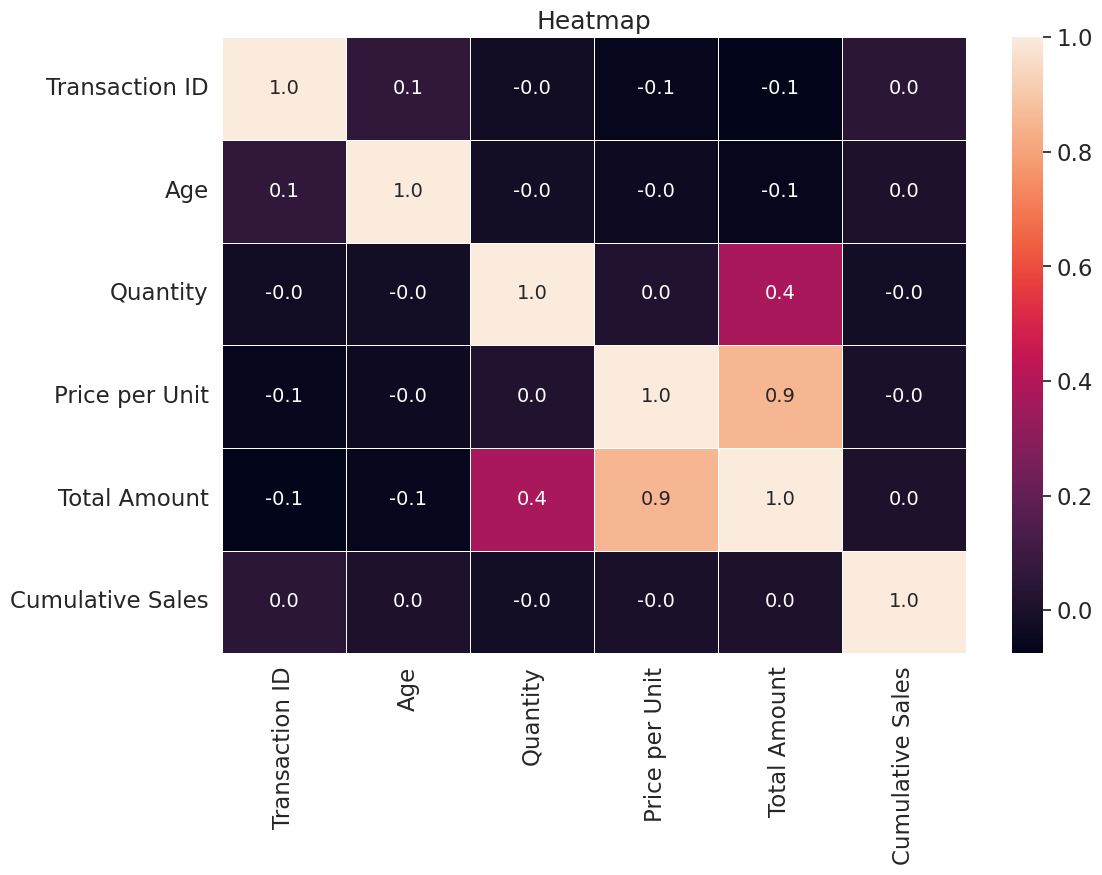

In [82]:
correlation=df[df.dtypes[df.dtypes == 'int64'].index].corr()
sns.set(font_scale=1.5)
plt.figure(figsize = (12,8))
plt.title("Heatmap", fontsize=18)
ax = sns.heatmap(correlation, annot=True,annot_kws={"size": 14},fmt='.1f', linewidths=.5)

**Price Elasticity Analysis**

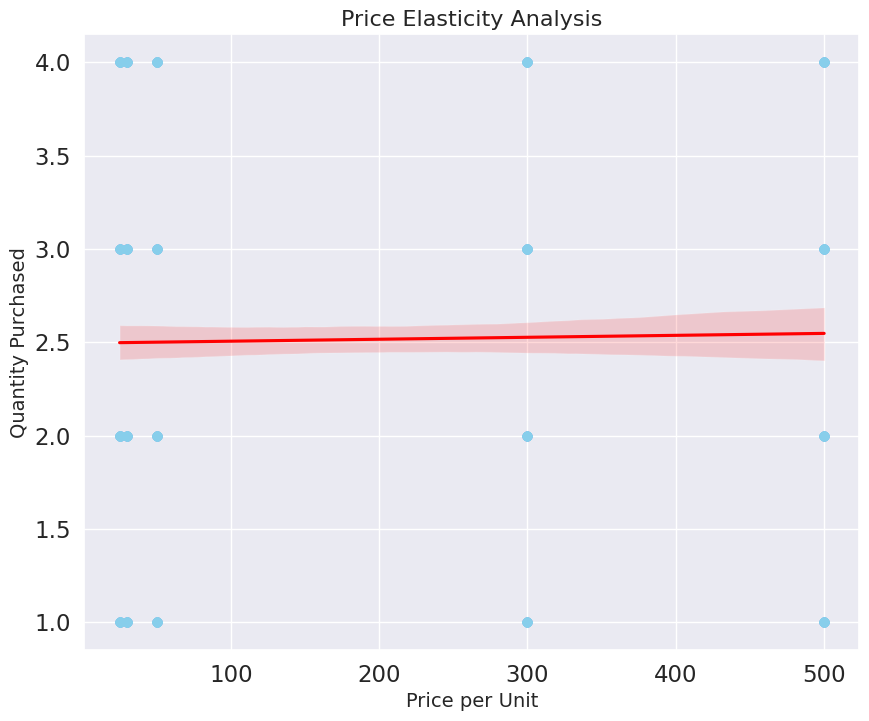

In [83]:
# Price elasticity analysis
plt.figure(figsize=(10, 8))
sns.regplot(x='Price per Unit', y='Quantity', data=df, scatter_kws={'alpha':0.5, 'color':'skyblue'}, line_kws={'color':'red'})
plt.title('Price Elasticity Analysis', fontsize=16)
plt.xlabel('Price per Unit', fontsize=14)
plt.ylabel('Quantity Purchased', fontsize=14)
plt.grid(True)
plt.show()


Price elasticity analysis reveals insights into how changes in price impact the quantity purchased, with a notable red line at 2.5 indicating a critical threshold in price sensitivity.

**Customer Segmentation**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


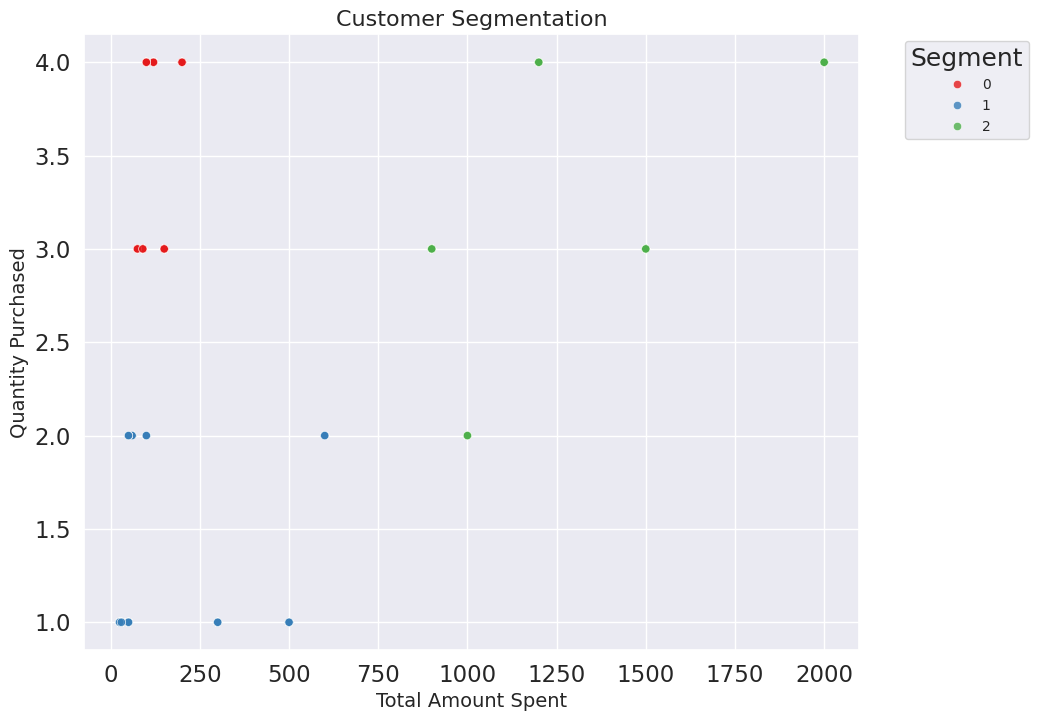

In [84]:
# Customer segmentation analysis
from sklearn.cluster import KMeans

# Selecting relevant features for segmentation
X = df[['Age', 'Total Amount', 'Quantity']]

# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

# Visualizing segments
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Total Amount', y='Quantity', data=df, hue='Segment', palette='Set1', alpha=0.8)
plt.title('Customer Segmentation', fontsize=16)
plt.xlabel('Total Amount Spent', fontsize=14)
plt.ylabel('Quantity Purchased', fontsize=14)
plt.legend(title='Segment', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Customer segmentation analysis categorizes customers into three distinct groups: red (0), blue (1), and green (2). The segmentation shows that the red group is predominant, with a concentration around 4.0, followed by the blue group, which peaks around 2.0 and 1.0. The green group appears to have a minimal presence.

In [85]:
# Revenue over the year
monthly_totals = df.groupby('Month')['Total Amount'].sum().reset_index()
print(monthly_totals)

    Month  Total Amount
0       1         36980
1       2         44060
2       3         28990
3       4         33870
4       5         53150
5       6         36715
6       7         35465
7       8         36960
8       9         23620
9      10         46580
10     11         34920
11     12         44690


**Histogram of all Continuous Variables**

<Figure size 1200x800 with 0 Axes>

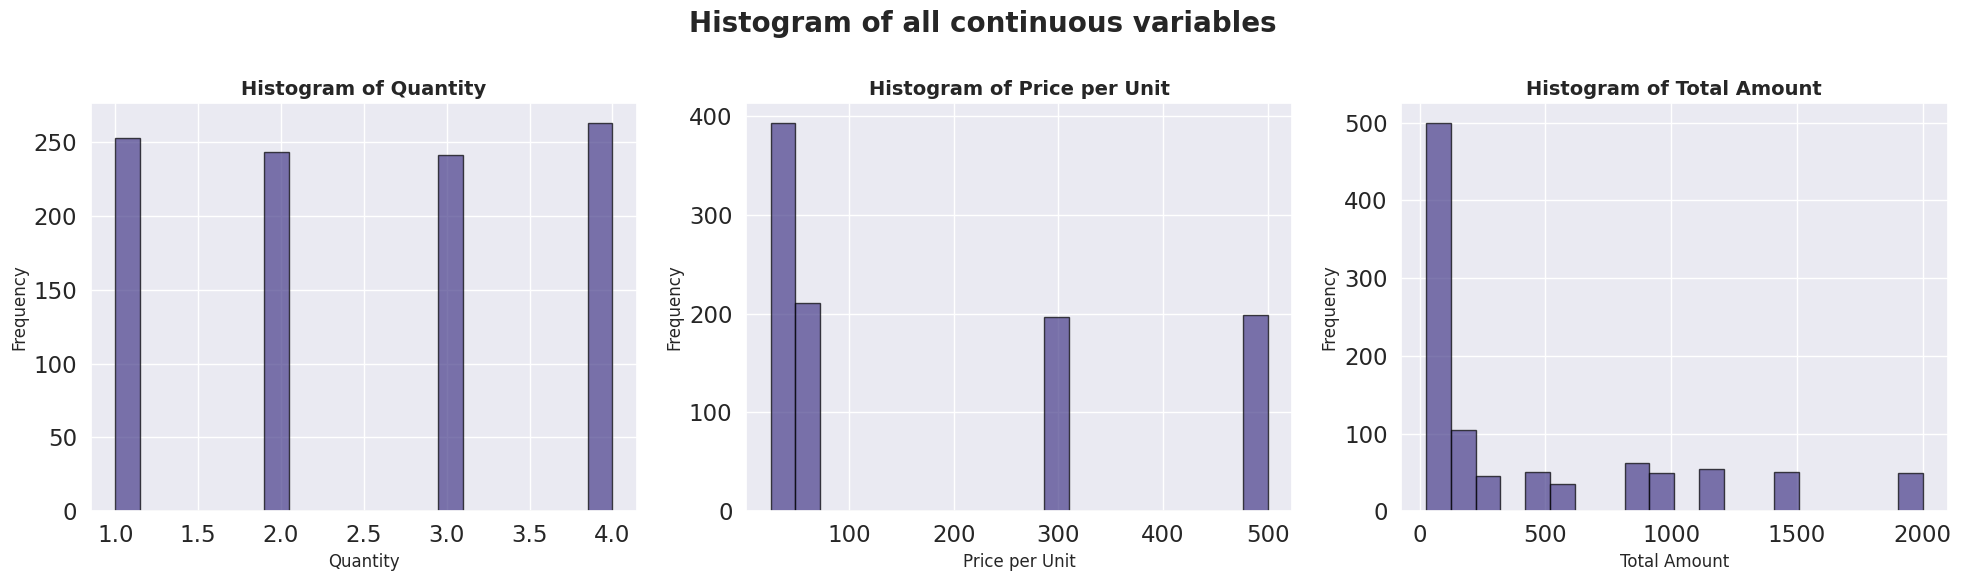

In [86]:
# frequency of the continues variables
df_ = df[['Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']]
plt.figure(figsize=(12, 8))
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].hist(df_['Quantity'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[0].set_title('Histogram of Quantity', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Quantity', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)

axs[1].hist(df_['Price per Unit'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[1].set_title('Histogram of Price per Unit', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Price per Unit', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)

axs[2].hist(df_['Total Amount'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[2].set_title('Histogram of Total Amount', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Total Amount', fontsize=12)
axs[2].set_ylabel('Frequency', fontsize=12)

plt.suptitle('Histogram of all continuous variables', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

Quantity: The histogram shows that the majority of transactions involve quantities around 4 or more items.

Price: Most products are priced between 0 and 100 units, with a higher frequency in this range.

Total Amount: Transactions mostly range between 0 and 250 units in total amount spent, indicating a concentration of purchases within this range.

In [87]:
cate_counts = df['Product Category'].value_counts()
cate_counts

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [88]:
cate_dist = (cate_counts / cate_counts.sum()) * 100
cate_dist = cate_dist.reset_index()
cate_dist.columns = ['Product Category', 'Percentage']
cate_dist

,Product Category,Percentage
0,Clothing,35.1
1,Electronics,34.2
2,Beauty,30.7


**Gender Distribution Percentage**

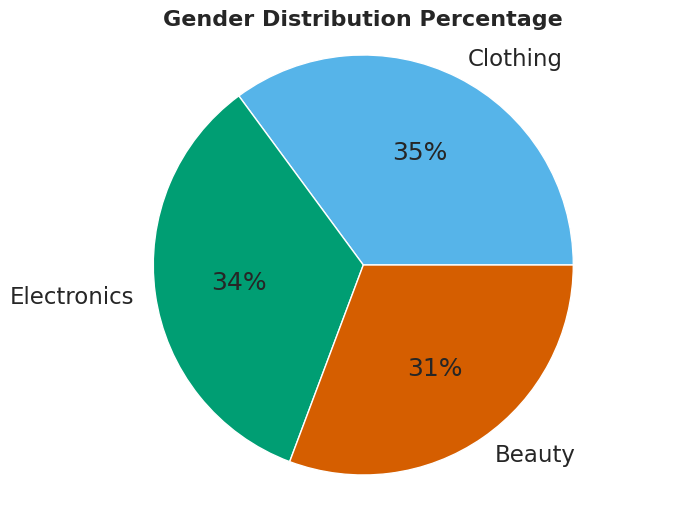

In [89]:
cate_counts = df['Product Category'].value_counts()

# Calculating the gender distribution percentage
cate_dist = (cate_counts / cate_counts.sum()) * 100
cate_dist = cate_dist.reset_index()
cate_dist.columns = ['Product Category', 'Percentage']
plt.figure(figsize=(8, 6))
plt.pie(cate_dist['Percentage'], labels=cate_dist['Product Category'], autopct='%.0f%%', colors=['#56b4e9', '#009e73','#d55e00'])
plt.title('Gender Distribution Percentage', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

Clothing: Approximately 35% of customers purchasing clothing are female.

Electronics: About 34% of customers purchasing electronics are female.

Beauty Products: Around 31% of customers purchasing beauty products are female.







**Total revenue by product category**

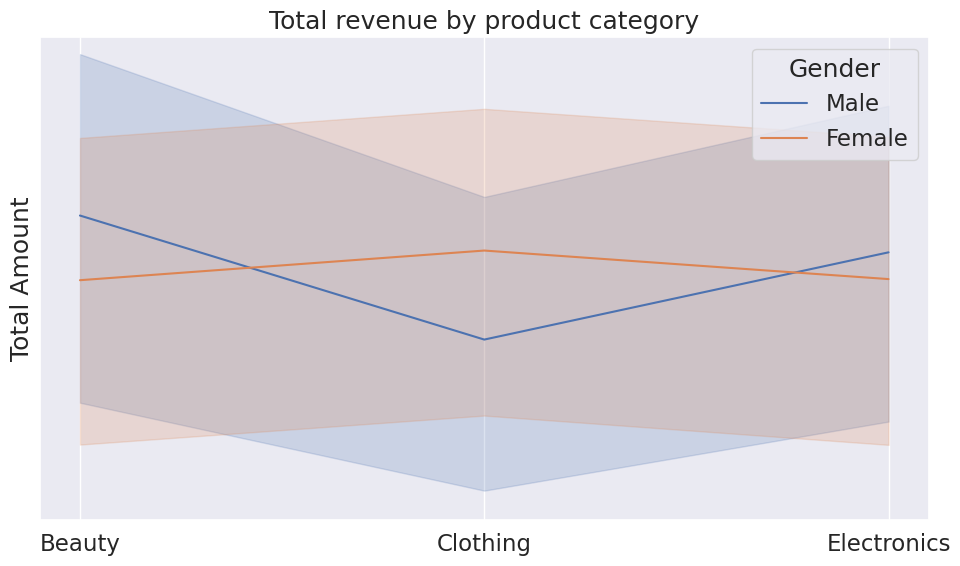

In [90]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Product Category", y="Total Amount", hue="Gender", data=df)
plt.title("Total revenue by product category")
plt.xlabel("")
plt.yscale("symlog")
plt.tight_layout()
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), ","),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10),
                      textcoords='offset points', fontsize=10, fontweight='bold')

plt.show()

The total revenue from male customers is depicted by a line down triangle near clothing, while female customers contribute exactly the opposite pattern.







**Revenue over Year**

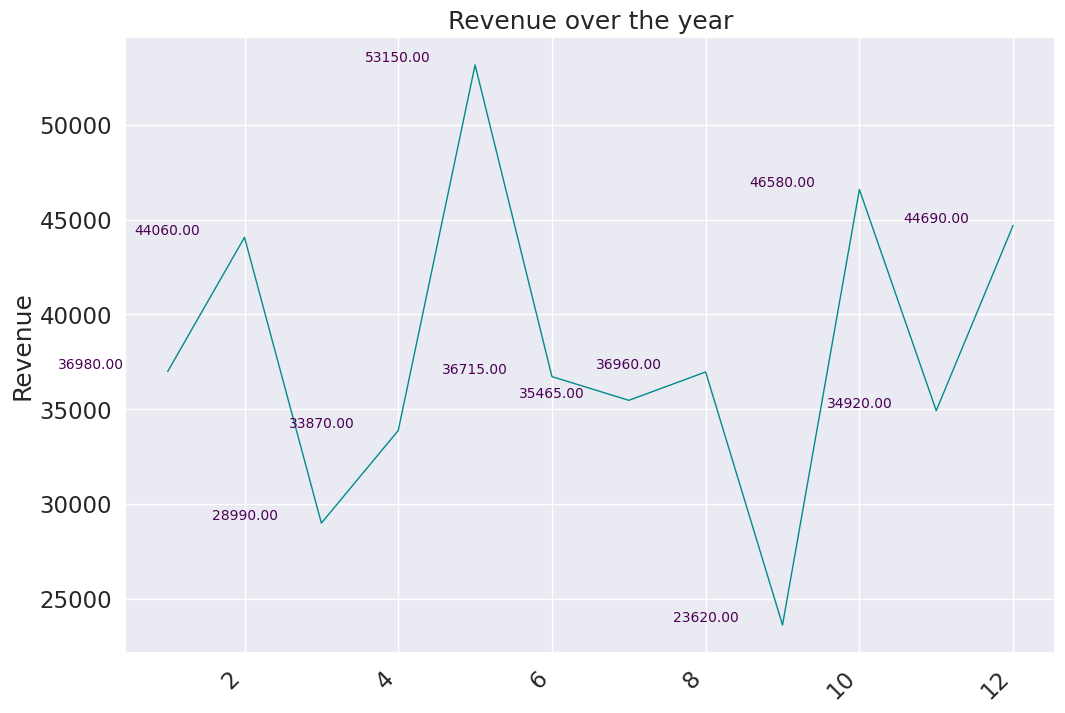

In [91]:
#Creating the monthly totals DataFrame
monthly_totals = df.groupby('Month')['Total Amount'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Total Amount', data=monthly_totals, color='#008B8B', linewidth=1)
plt.title('Revenue over the year')
plt.xlabel('')
plt.ylabel('Revenue')
for i, total in enumerate(monthly_totals['Total Amount']):
    plt.text(i, total, f"{total:.2f}", va='bottom', ha='center', color='#4B0055', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.show()


The analysis of revenue over the year reveals that the highest revenue recorded is 53,150 units, with many instances falling within the range of 40 to 50 units.








# Conclusion


In this EDA project, we explored comprehensive retail sales data to extract actionable insights:

- **Sales Trends and Seasonality:** Sales exhibited varying trends over time, with peaks notably in May for electronics and a seasonal high in January. Seasonal patterns revealed through box plots provided insights into fluctuations across months.
  
- **Customer Insights:** Female customers predominantly favored clothing, while males showed a stronger preference for electronics, as reflected in the revenue distribution among genders.

- **Product Analysis:** Clothing, electronics, and beauty products emerged as top revenue generators. Price elasticity analysis highlighted critical price thresholds influencing purchase behavior, guiding strategic pricing decisions.

- **Recommendations:** To capitalize on these findings, implement targeted marketing campaigns tailored to customer preferences, optimize pricing strategies based on elasticity insights, and enhance customer retention through personalized engagement strategies.

By leveraging these insights, businesses can effectively navigate market dynamics, optimize operational strategies, and foster sustainable growth in the competitive retail sector.